# --- Pasos a seguir para estimar clusters ---

* Podemos estimar la k:
    * <span style="color:red"><b>NO</span>: Propagación de la afinidad
    * <span style="color:green"><b>SI</span>: Podemos usar la distancia Euclídea:
        * <span style="color:green"><b>SI</span>: K-Means
        * <span style="color:red"><b>NO</span>: Buscar valores centrales:
            * <span style="color:green"><b>SI</span>: K-Medoides 
            * <span style="color:red"><b>NO</span>: Los datos son linealmente separables:
                * <span style="color:green"><b>SI</span>: Clustering aglomerativo
                * <span style="color:red"><b>NO</span>: Clustering Espectral

# Clustering jerárquico y dendrogramas

* El objetivo es agrupar los datos que presenten ciertas semejanzas entre sus miembros, es decir que 'se parezcan'.
* También buscamos que los datos que pertenezcan a grupos diferentes tengan rasgos lo suficientemente diferentes entre si. 
* Los clusters deben ser identificables y de tamaño considerable.
* Los puntos de un mismo cluster deben ser compatibles y tener intersección mínima con cualquier otro cluster.
* Los cluster deben tener sentido desde el contexto del análisis. Los puntos de un mismo cluster deben tener propiedades en el contexto estudiado.

Los llamados **métodos jerarquicos** tiene por objetivo el agrupar clusters para crear uno de nuevo, o bien separar un cluster ya existente para dar origen a otros dos de forma que sucesivamente se vaya realizanod este proceso de o bien aglomeración o bien división minimizando alguna distancia, o bien maximizando alguna medida de semejanza o de similitud entre cada uno de los elementos que forman parte del clustering. Por eso, se dividen en do tipos de jerarquías:

**1- Métodos jerárquicos aglomerativos (método ascendente):**
* Empieza con tanto grupos como inividuos, tenemos tantos cluster como puntos tenga el dataset.
* A partir de esos clusters individuales se van formando grupos de forma ascendente tomando algunas de las formas de unión (explicadas más abajo) hasta que todos quedan englobados dentro de un cluster común.

**2- Métodos jerárquicos disociativos (método descendente):**
* Es inveros al método ascendente. Todos los puntos comienzan en un único cluster y poco a poco se van creando grupos más pequeños. 
* Al final tenemos tantos grupos como casos hayamos tratado.

**Para unir los clusters se pueden usar diferentes estrategias o métodos, aunque no existe una solución óptima:**


<img src="img/enlace_7.jpg" width="600">

## Método de Enlace Simple *(Single-link)*:

<img src="img/enlace_1.jpg" width="600">

## Método de Enlace Completo *(Complete-link)*:

<img src="img/enlace_2.jpg" width="600">

## Método de Enlace Promedio *(Averange-link)*:

<img src="img/enlace_3.jpg" width="600">

## Método de Enlace del Centroide *(Centroid distance)*:

<img src="img/enlace_4.jpg" width="600">

## Método de Enlace de Ward:

* Es un procedimiento jerárquico donde en cada etapa se unen los dos clusters que provoquen un menor incremento en el valor total de la suma de los cuadrados de las diferencias dentro de cada cluster de sus individuos.
* Minimizamos para cluster las distancias de sus puntos al centroide (en realidad las distancias al cuadrado). Y esta distancia es la varianza. Asi que en el fondo lo que hacemos es minimizar las varianzas.

<img src="img/enlace_5.jpg" width="700">

## Procedimiento para un Clustering Jerárquico aglomerativo:

<img src="img/enlace_6.jpg" width="600">

**1.** Empezamos con cada observación en un cluster (tenemos $N$ clusters).

**2.** Encontramos la menor distancia en la matriz de distancias y unimos las dos obervaciones en un nuevo cluster.

**3.** Recalculamos las distancias entre los clusters antiguos y el nuevo recién creado con alguno de los métodos de enlace vistos anteriormente.

**4.** Repetimos los pasos *2* y *3* hasta que solo queda un cluster con las $N$ observaciones

Antes de empezar usando Python, pongamos un poco de notación para hablar todos el mismo idioma:

* **X** dataset (array de n x m) de puntos a clusterizar.
* **n** número de datos.
* **m** número de rasgos.
* **Z** array de enlace del cluster con la información de las uniones.
* **k** número de clusters.

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

(150, 2)


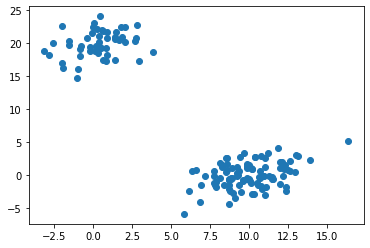

In [2]:
np.random.seed(4711)
'''cluster de 100 puntos aleatorios random multivariate(en varias dimensiones). 
Con una normal entorno al 10 en x y 0 en y, con una desviacion tipica 3 puntos en horizontal(x) y 4 en la vertical'''
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,]) 
'''cluster de 50 puntos aleatorios random multivariate(en varias dimensiones). 
Con una normal entorno al 0 en x y 20 en y, con una desviacion tipica 3 puntos en horizontal(x) y 4 en la vertical'''
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,]) 
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1]) #(x, y)
plt.show()

In [19]:
Z = linkage(X, "ward") #creamos una matriz de enlace usando el método ward
Z[:5,:] #[punto1, punto2, distancia, numero de puntos]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00]])

**Vamos a comprobar el coeficiente de correlación cophenetico.**

Lo que hace es comparar las distancias `2` a `2` de nuestras muestras con las que se han llevado a cabo con el clustering jerárquico. Cuanto más cercano sea al valor a `1` (al aplicar la función cophenet) mejor será el clustering, ya que preservará las distancias originales que hubiera entre las diferentes observaciones.

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [10]:
c, coph_dist = cophenet(Z, pdist(X)) #pdist(X) le pasamos la distancia original de los datos
c

0.9800148387574268

In [11]:
Z[0] #el punto 52 y el 53 son los mas cercanos con una distancia de 4.15e-02 y ha generado un cluster de 2 elementos

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [12]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [13]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

* EN la fila 14 aparece el punto 152, que es un cluster genereado, y justo debajo el 158 lo mismo. Su valor real del punto esta aqui abajo explicado

In [9]:
print(Z[152-len(X)])# cluster 152
print(Z[158-len(X)])#cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [10]:
X[[33,62,68]] #el algoritmo ha decidio que estos numeros se parecen y ha decidido juntarlos

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

In [11]:
X[[15,69,41]] #el algoritmo ha decidio que estos numeros se parecen y ha decidido juntarlos

array([[ 8.72437412, -0.73101911],
       [ 8.69529949, -0.62048946],
       [ 8.81582877, -0.56394025]])

**Vamos a comprobar si hay semejanzas**

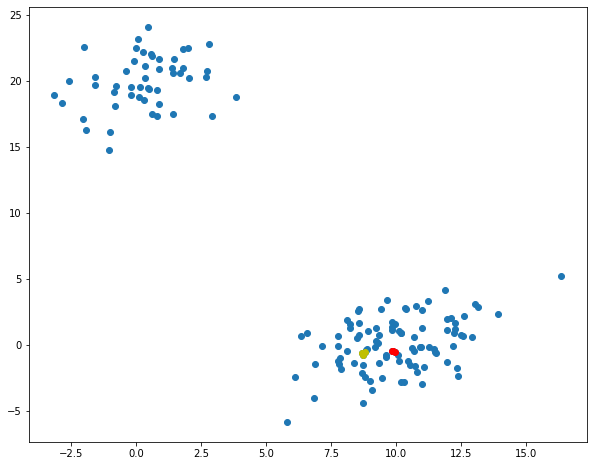

In [12]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])##pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')##destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##destacamos en amarillo el segundo cluster
plt.show()

### Representación gráfica de un dendrograma

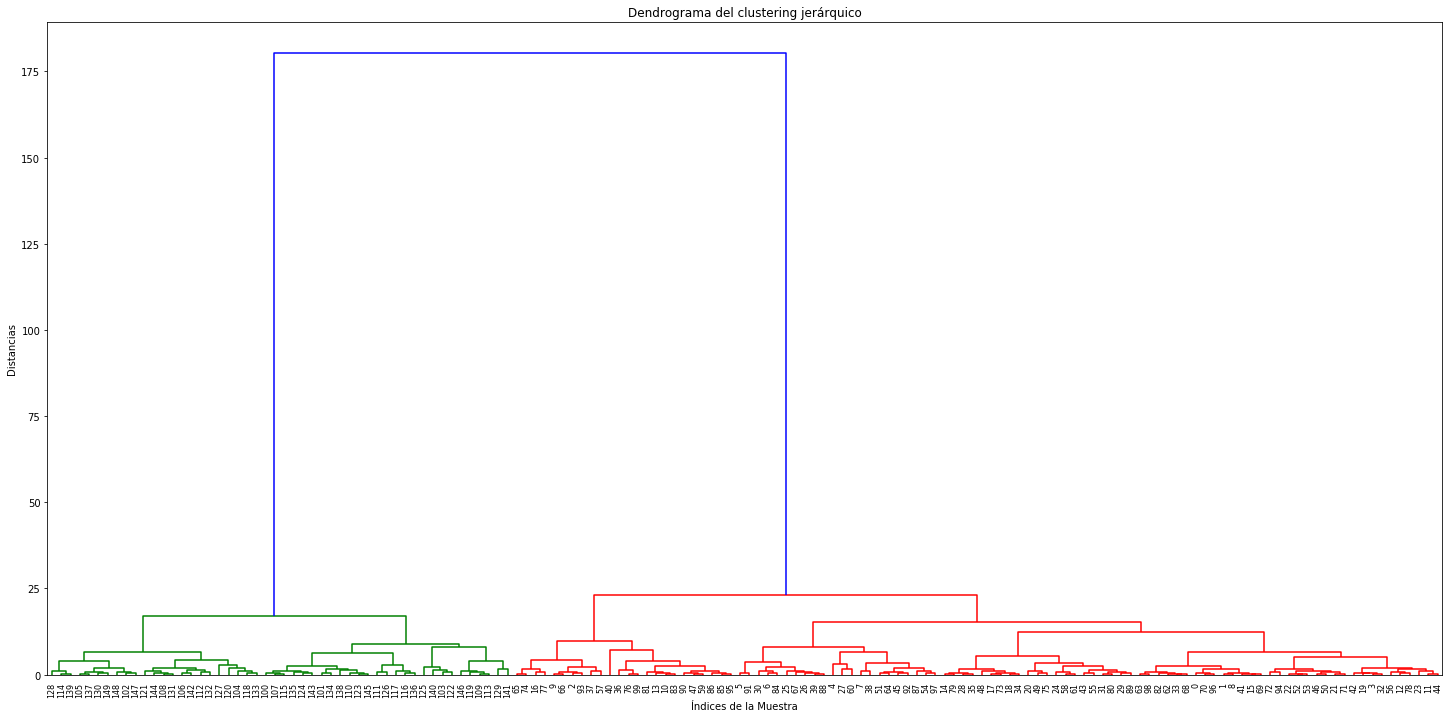

In [20]:
plt.figure(figsize=(25,12))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180) 
#color_threshold para poner el umbral a partir del cual queremos dibujar cluster diferentes(por defecto 70% distnacia)
#0.7 viene de 70% y multiplicado por 180, hemos trampeado un poco porque sabemos que la distancia es de 180 
#entre los dos grandes bloques (abajo lo hemos calculado)
plt.show()

* Las lineas horizontales indican uniones de clusters y las verticales nos indican a que clusters o etiquetas forman parte las uniones que formarán otro cluster.

* Vemos por ejemplo que los dos cluster verdes más grandes se unen a una distancia aprox de 20
* Viendo esta gráfica podemos apreciar que nuestra poblacion está dividida en 2 grupos(grupo rojo y grupo verde), como se ve perfectamente en la representación por puntos del principio de esta sección que hemos generado con aleatorios

In [21]:
Z[-4:,] #vemos que pinta tienen los últimos 4 puntos y ver todas las columnas

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma
* Representacion reducida para ver más clara la representación

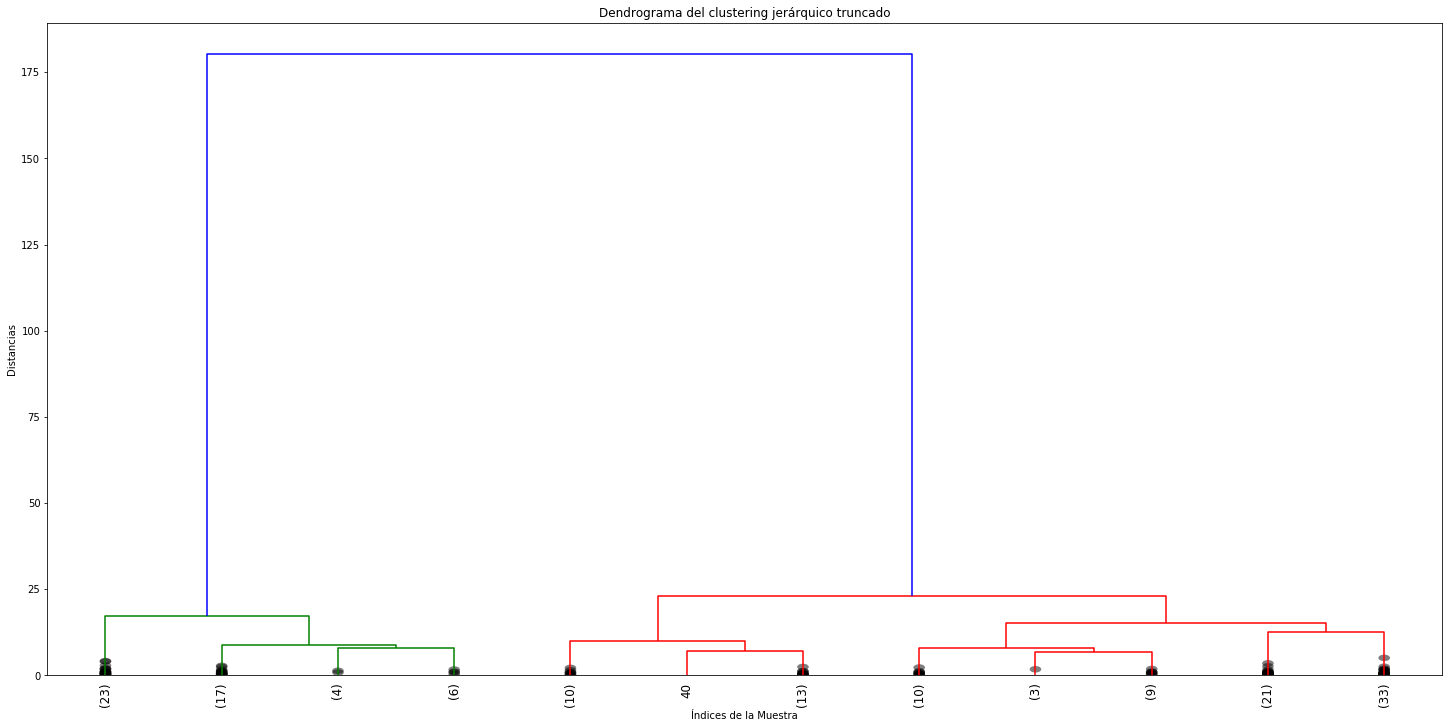

In [24]:
plt.figure(figsize=(25,12))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)
#trucate_mod="lastp" ponemos los ultimos p(=12) elementos que se unen en el dendrograma
#show_leaf_counts=True nos sirve para mostrar u ocultar los elementos de los nodos hoja que se van uniendo en el arbol
#show_contracted=True para mostrar la distribucion contraida en las ramas(puntos negros) que nos vale para calcular el peso
plt.show()

* Vemos en el eje de las x que el 40 es el único nodo que no se ha unido previemanete a otros clusters(no aparece con ())
* Los que tienen () nos indican cuantos elementos se han unido en ese punto (23)= 23 elementos que se han unido previamente.

### Dendrograma tuneado/Personalizado

In [28]:
def dendrogram_tune(*args, **kwargs): #funcion que hay que pasar una lista de argumentos y otra de kwargs opcionales
    
    max_d=kwargs.pop("max_d", None) #para que añada la máxima distancia
    
    #si existe max_d y 'color_threshold' no aparece en kwargs(si no definimos color_threshold pero si max_d)
    if max_d and 'color_threshold' not in kwargs: #si existe max_d y 'color_threshold' no aparece en kwargs
                                                  #(si no definimos color_threshold pero si max_d)
        kwargs['color_threshold'] = max_d
        #entonces definimos el array de argumentos opcionales donde decidimos cual sera el valor umbral donde 
        #cortaremos el dendrograma, que vendrá dado por max_d
        
    annotate_above = kwargs.pop('annotate_above', 0) 
    #sino viene asignada la distancia a partir de la cual queremos anotar en el dendograma las distancias de union 
    #entre cluters, pillamos como distancia mínima de union entre clusters el 0, de esta forma todas la uniones 
    #del cluster quedarán anotadas
    
    ddata = dendrogram(*args,**kwargs)
    #definimos una variable con argumentos obligatorios(los predefinidos ya por dendrogram()) 
    #y los opcionales creados por nosotros(kwargs)
    
    #si NO aparece como False el argumento opcional 'no_plot'(por defecto sino se pone nada sera False, 
    #por lo tanto se cunnmplirá la condición)
    if not kwargs.get('no_plot', False): 
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        
        #Añadimos y agrupamos con zip, i de index, d de distance y c de color
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']): 
            x = 0.5 * sum(i[1:3]) #tuneamos aplicando a las columnas de la 1 a la 3 de las coordenadas i
            y = d[1]
            
            #si estamos por encima de la distancia minima dónde se unen los elementos(annotate_above), entonces...
            if y>annotate_above: 
                plt.plot(x,y,'o',c=c) #el primer c indica la coloracion(es argumento de plot) y la segunda c es 
                                      #la variable de color antes creada
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

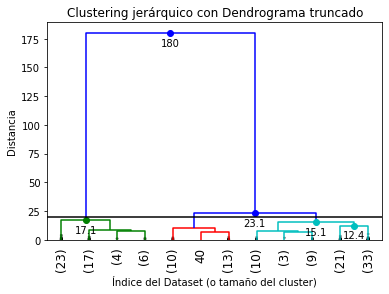

In [29]:
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

## Corte automático del dendrograma

### Método de la inconsistencia

* Lo que intetará será ajustar la inconsistencia como la fracción entre una determinada altura menos el promedio de todas las alturas, dividido por la desviación standard de todas y cada una de las alturas:


   **Inconsistencia:** $$y_i = \frac{h_i-avg(h_j)}{std(h_j)}$$

In [18]:
from scipy.cluster.hierarchy import inconsistent

In [19]:
depth = 3 #profundidad
incons = inconsistent(Z, depth) #buscamos las incosistencias 
incons[-10:] #ultimas 10 uniones, nos da: [el promedio, la desviacion estandard, el count(numero de elementos),factor de inconsistencia para cada una de las uniones]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

* Hay que tener en cuenta que la formula de arriba lo que hace es comparar la altura a la que se une cada cluster h_i con el promedio de union y lo normaliza en todos los clusters de tantos de niveles de profundidad como hallamos especificado en depth. Si ponemos por ejemplo depth=5 será cada uno de los clusters que se forma junto con los 5 anteriores (5 niveles por debajo).

### Método del codo *(explicado en T6 - 5)*

* Intenta buscar el step del clustering donde la aceleracion del crecimiento de la distancia es mayor, es decir, el mayor codo que se puede generar cuando se dibuja la linea de los incrementos de las distancias de un cluster a otro. 

[  7.11106083   7.86878542   8.04935282   8.74822275   9.84427829
  12.42734657  15.11533118  17.11527362  23.12198936 180.27043021]
[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1.51141725e+02  4.00677330e+00 -6.88042176e-01  1.04916333e-01
  1.48701273e+00  3.97185622e-01  5.18302524e-01 -5.77157189e-01]
[ 1.51141725e+02  4.00677330e+00 -6.88042176e-01  1.04916333e-01
  1.48701273e+00  3.97185622e-01  5.18302524e-01 -5.77157189e-01]
[2 3 4 5 6 7 8 9]


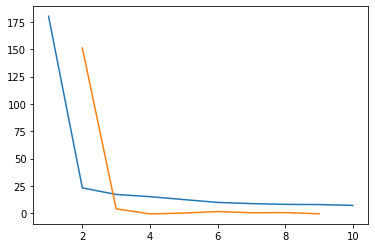

El número óptimo de cluster es 2


In [24]:
last = Z[-10:,2] #nos quedamos con los últimos 10 registros y con la columna de las distancias(la columna 2)
print(last)
last_rev = last[::-1] #los giramos, cogemos todos los elementos(::) y el ultimo pasa a ser el primero(-1)
print(last_rev)
idx = np.arange(1, len(last)+1)
print(idx) #para ver los valores de este eje
plt.plot(idx, last_rev) #linea azul

#medimos las aceleraciones, las diferencias con los cambios en las distancias
acc = np.diff(last,n=2) #aceleraciones, que es un array que es la resta entre cada uno con el siguiente(2) de last
'''Ejemplo de diff():
x = np.array([1, 2, 4, 7, 0])
np.diff(x) ---> array([ 1,  2,  3, -7])
np.diff(x, n=2) ---> array([  1,   1, -10])
'''
acc_rev = acc[::-1] #lo giramos
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev) #tenemos que represntar todos menos los dos ultimos y sumarle 1 para que queden desplazados
print(idx[:-2]+1) #para ver que veamos los valores que tiene este eje, va desde el primer elemento hasta el penultimo, y desplaza el intervalo +1 a la derecha
plt.show()
k = acc_rev.argmax() +2 #buscamos el elemento maximo de la aceleracion girada(revertida) y lo desplazo 2 poiciones(si idx fuese 0 el máximo se encuentra 2 cluster mas alla)
print("El número óptimo de cluster es %s"%str(k))


* En las gráficas vemos las diferencias en orden invertido, por ejemplo con la azúl, el último cluster que se encuentra a una distancia(altura) de 180, el segundo cluster a una altura de 23,...


* En la grafica(naranja) vemos las diferencias en los incrementos, vemos los cambios en las distancias, del primero al segundo hay un salto de 150 puntos, del segundo al tercero de unos 15...uno ve claramente que el cluster donde se forma la aceleracion maxima(incremento maximo) es con 2 cluster(cuando solo hay 2 clusters)

**Creamos 3 clusters más:**

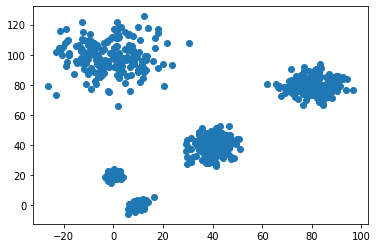

In [21]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [22]:
Z2 = linkage(X2,"ward")

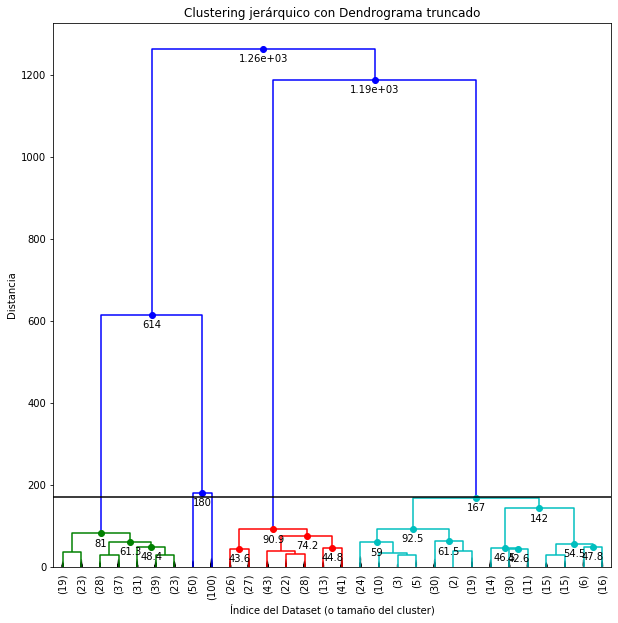

In [23]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


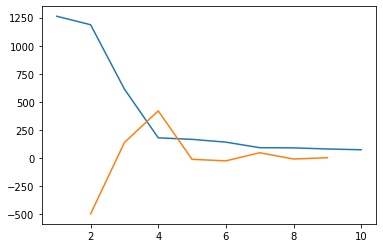

El número óptimo de cluster es 4


In [24]:
#Aplicamos el método del codo
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

* En la azul vemos que la mayor es la de unos 1260(vemos que coincide con el dendograma), el siguiente a 1186, vemos que el cluster óptimo es 4, tanto viendo la aceleracion(naranja) como la de distancia, aunque vemos que realmente sería 5 clusters...ya que nuestra observación directa apreciamos 5. Este método puede parecer absurdo para 2 dimensiones, pero es muy importante para N-dimensiones.

In [25]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


## Recuperar los clusters y sus elementos

In [32]:
from scipy.cluster.hierarchy import fcluster

### **Primera forma:** Cortamos por distancia máxima

In [33]:
max_d=25 #decidimos la distancia de corte en nuestros datos que hemos creado al principio(nos fijamos en nuestro dendograma personalizado)
clusters = fcluster(Z, max_d, criterion="distance") #(matriz de enlace(Z), distancia max, y el criterio distance)
clusters #aparecen 150 elementos/entradas, indicando en qué cluster está cada entrada

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### **Segunda forma:** Cortamos por número de clusters

In [36]:
k=2 #numero de clusters
clusters = fcluster(Z, k, criterion="maxclust") #en el criterio nos basaremos en el máximo numero de clusters
clusters #vemos que sale el mismo que antes, lo que indica que antes hemos elegido bien el corte

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### **Tercera forma:** Por el método de la inconsistencia

In [38]:
fcluster(Z, 8, depth=10) #(matriz de enlace(Z), numero minimo de elementos que tienen que formar parte del cluster(8), numoero de elementos que tiene que ir mirando hacia abajo para elaborar el metodo)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

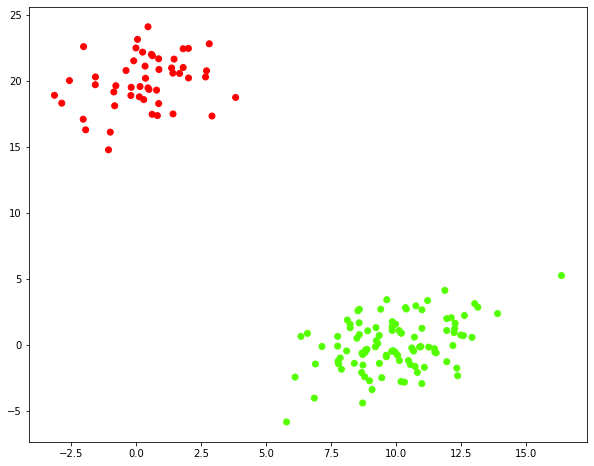

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

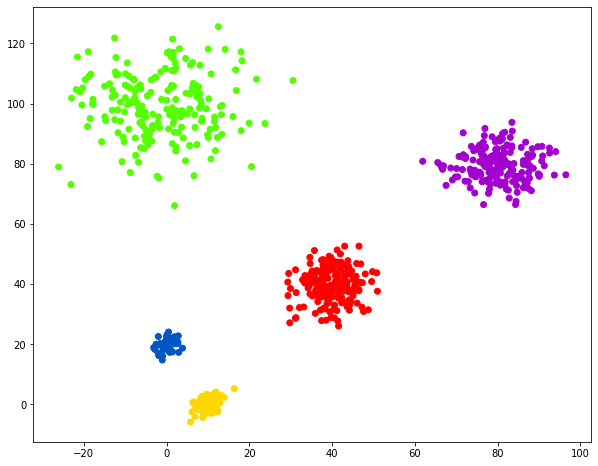

In [31]:
max_d=170
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()